# Data fusion experiment

## Setup

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

import pandas as pd
import open3d as o3d
import numpy as np
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
# %matplotlib auto
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from pandas import DataFrame
# For plotting
import plotly.io as pio
import plotly.graph_objects as go



# Where to save the figuresimport pandas
from pandas import DataFrame


# For plotting
import plotly.io as pio
import plotly.graph_objects as go

import numpy as np
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(IMAGES_PATH, exist_ok=True)

## Experiment1 
- Audio signal, position, velocity data

In [2]:
data_file = os.path.join(DATA_PATH, "position_velocity.csv")
data = pd.read_csv(data_file, sep=",", header=None, skiprows=1)

# data_audio_1.head()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.635843e+18,0.00000,1131.563232,-1908.659912,1226.878540,-90.0812,-0.5735,178.156906,-0.123621,-25.373214,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
1,1.635843e+18,0.00395,1131.562744,-1908.760132,1226.876343,-90.0812,-0.5734,178.156906,-0.265368,-24.089534,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
2,1.635843e+18,0.00809,1131.561646,-1908.859863,1226.873047,-90.0812,-0.5731,178.156906,-0.280254,-25.970234,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
3,1.635843e+18,0.01201,1131.560547,-1908.961670,1226.872437,-90.0812,-0.5731,178.156799,-0.154528,-25.991318,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
4,1.635843e+18,0.01596,1131.559937,-1909.064331,1226.872925,-90.0812,-0.5730,178.156799,-0.176063,-24.736846,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816


In [3]:
data.columns = ["Time_raw", "time1", "X", "Y", "Z","A","B","C", "Vx_c", "Vy_c", "Vz_c","Speed_c",
                "time_raw2", "time2", "X_tf", "Y_tf", "Z_tf", "linearX_tf", "linearY_tf",
                "linearZ_tf",  "angular_X_tf",  "angular_Y_tf",  "angular_Z_tf","linear_speed_calculated"]
data.head()

,Time_raw,time1,X,Y,Z,A,B,C,Vx_c,Vy_c,...,X_tf,Y_tf,Z_tf,linearX_tf,linearY_tf,linearZ_tf,angular_X_tf,angular_Y_tf,angular_Z_tf,linear_speed_calculated
0,1.635843e+18,0.00000,1131.563232,-1908.659912,1226.878540,-90.0812,-0.5735,178.156906,-0.123621,-25.373214,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
1,1.635843e+18,0.00395,1131.562744,-1908.760132,1226.876343,-90.0812,-0.5734,178.156906,-0.265368,-24.089534,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
2,1.635843e+18,0.00809,1131.561646,-1908.859863,1226.873047,-90.0812,-0.5731,178.156906,-0.280254,-25.970234,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
3,1.635843e+18,0.01201,1131.560547,-1908.961670,1226.872437,-90.0812,-0.5731,178.156799,-0.154528,-25.991318,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816
4,1.635843e+18,0.01596,1131.559937,-1909.064331,1226.872925,-90.0812,-0.5730,178.156799,-0.176063,-24.736846,...,-1.913958,-0.030852,0.518156,0.024746,0.000003,-0.001858,-0.000168,-0.002392,0.000105,0.024816


## Data visualization

### position, speed

In [4]:
fig = go.Figure()

# Plot points, using distance FROM plane as color scale
fig.add_trace(go.Scatter3d(x = data['X_tf'],
                           y = data['Y_tf'],
                           z = data['Z_tf'],
                           mode='markers',
                           marker=dict(size=5,
                                       color=data['linear_speed_calculated'] [data['linear_speed_calculated'] > 0.0001], #data_meltpool['minor_axis']/5 or data_velocity['speed']
                                       colorscale='oranges',# other colorscale options: agsunset
                                       cmin = 0,  # minimum color value, --- data_velocity['speed'].min()   ### need some adjustment here
                                       cmax = data['linear_speed_calculated'].max(),  # maximum color value
                                       showscale=True)
                        )
            )

fig.update_layout(
#     xaxis_title="X Axis",
#     yaxis_title="Y Axis",
#     zaxis_title="Z Axis",
    title={
        'text': "Multidimensional Data visualisation - Colour (Velocity)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
#     font=dict(
#         family="Courier New, monospace",
#         size=11,
#         color="RebeccaPurple"
#     )
)

# fig.update_layout(scene = dict(xaxis = dict(nticks=6, range=[data_position_2['x'].min(), data_position_2['x'].max()]),
#                                yaxis = dict(nticks=6, range=[data_position_2['y'].min(), data_position_2['y'].max()]),
#                                zaxis = dict(nticks=3, range=[data_position_2['z'].min(), data_position_2['z'].max()]),
#                                aspectmode = 'data'  # preserve the proportion of actual axes data
#                                )
#                   )


# Use the offline mode of plotly:
pio.write_html(fig, file="data_visualization_velocity_position_by_tf.html", auto_open=True)

In [5]:
fig = go.Figure()

# Plot points, using distance FROM plane as color scale
fig.add_trace(go.Scatter3d(x = data['X'],
                           y = data['Y'],
                           z = data['Z'],
                           mode='markers',
                           marker=dict(size=5,
                                       color=data['Speed_c'] [data['Speed_c'] > 0.0001], #data_meltpool['minor_axis']/5 or data_velocity['speed']
                                       colorscale='oranges',# other colorscale options: agsunset
                                       cmin = 0,  # minimum color value, --- data_velocity['speed'].min()   ### need some adjustment here
                                       cmax = data['Speed_c'].max()+3,  # maximum color value
                                       showscale=True)
                        )
            )

fig.update_layout(
#     xaxis_title="X Axis",
#     yaxis_title="Y Axis",
#     zaxis_title="Z Axis",
    title={
        'text': "Multidimensional Data visualisation - Colour (Velocity)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
    
#     font=dict(
#         family="Courier New, monospace",
#         size=11,
#         color="RebeccaPurple"
#     )
)

# fig.update_layout(scene = dict(xaxis = dict(nticks=6, range=[data_position_2['x'].min(), data_position_2['x'].max()]),
#                                yaxis = dict(nticks=6, range=[data_position_2['y'].min(), data_position_2['y'].max()]),
#                                zaxis = dict(nticks=3, range=[data_position_2['z'].min(), data_position_2['z'].max()]),
#                                aspectmode = 'data'  # preserve the proportion of actual axes data
#                                )
#                   )


# Use the offline mode of plotly:
pio.write_html(fig, file="data_visualization_velocity_position_from_rsi.html", auto_open=True)

Text(0.5, 1.0, 'X-Y plot (Direct data from controller)')

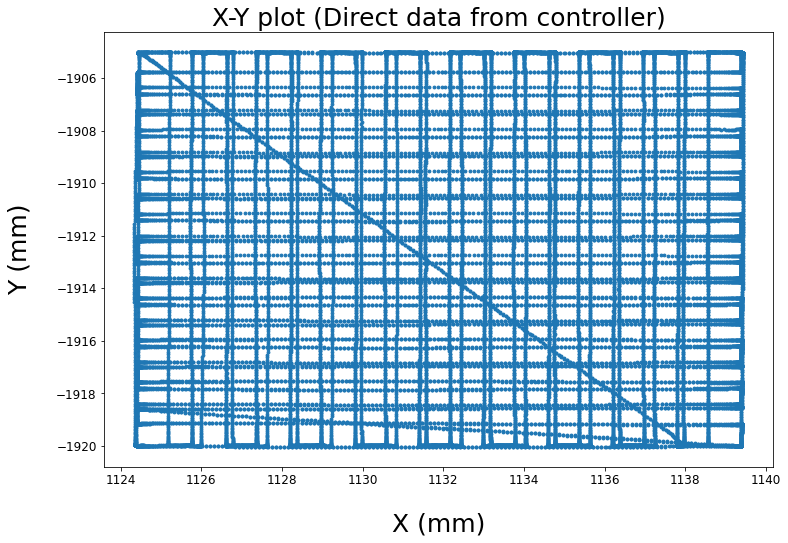

In [6]:
# this will make the plot interactive
# %matplotlib auto
#------extract x,y,z value of the points-----
x = data['X']
y = data['Y']
z = data['Z']

plt.figure(figsize=(12, 8))
ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
ax.scatter(x, y, s = 8); # other cmap options: winter, Greens
ax.set_xlabel('X (mm)', fontsize=25, labelpad=25)
ax.set_ylabel('Y (mm)', fontsize=25,labelpad=25)
plt.title('X-Y plot (Direct data from controller)',fontsize=25)

Text(0.5, 1.0, 'X-Z plot (Direct data from controller)')

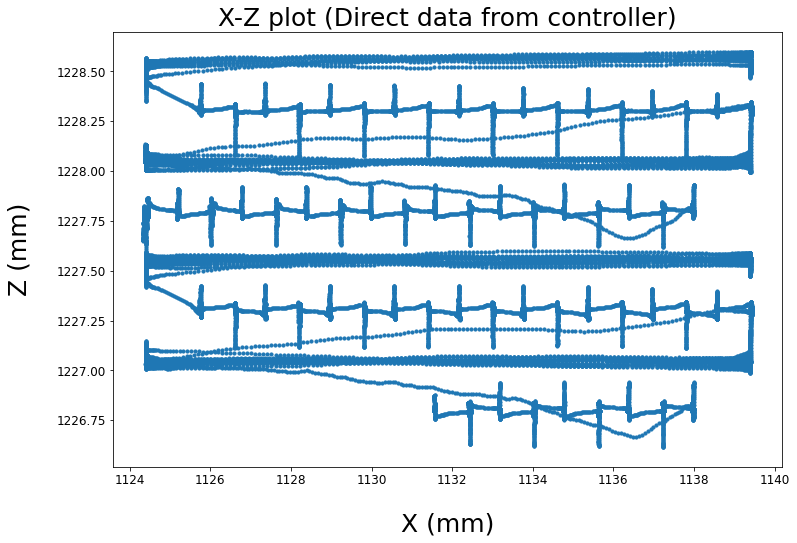

In [7]:
# this will make the plot interactive
# %matplotlib auto

plt.figure(figsize=(12, 8))
ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
ax.scatter(x, z, s = 10); # other cmap options: winter, Greens
ax.set_xlabel('X (mm)', fontsize=25, labelpad=25)
ax.set_ylabel('Z (mm)', fontsize=25,labelpad=25)
plt.title('X-Z plot (Direct data from controller)',fontsize=25)

Text(0.5, 1.0, 'Y-Z plot (Direct data from controller)')

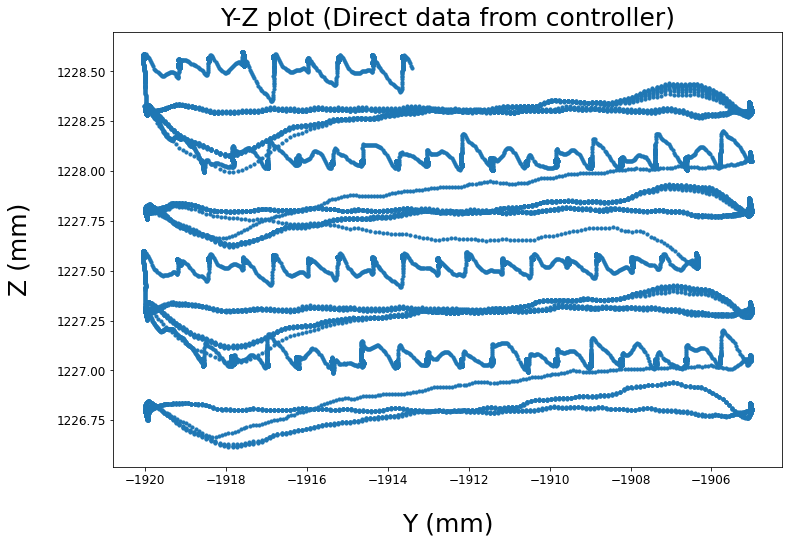

In [8]:
# this will make the plot interactive
# %matplotlib auto

plt.figure(figsize=(12, 8))
ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
ax.scatter(y, z, s = 10); # other cmap options: winter, Greens
ax.set_xlabel('Y (mm)', fontsize=25, labelpad=25)
ax.set_ylabel('Z (mm)', fontsize=25,labelpad=25)
plt.title('Y-Z plot (Direct data from controller)',fontsize=25)

Text(0.5, 1.0, 'Time-Speed plot (Direct data from controller)')

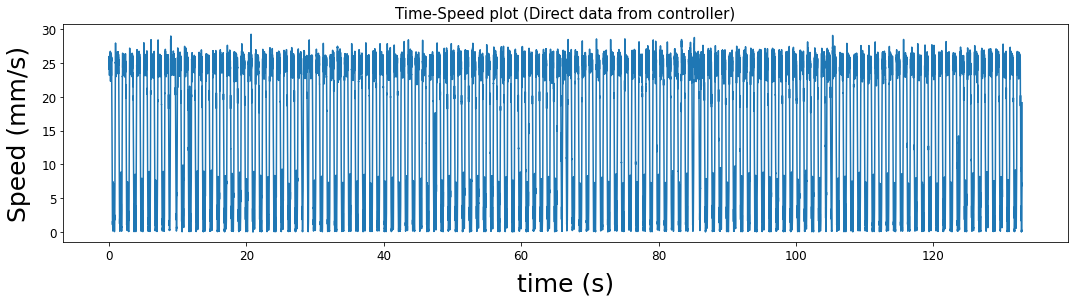

In [9]:
# this will make the plot interactive
# %matplotlib auto
#------extract x,y,z value of the points-----
t1 = data["time1"]
Vx = data['Vx_c']
Vy = data['Vy_c']
Vz = data['Vz_c']
Speed = data["Speed_c"]

plt.figure(figsize=(18, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t1, Speed, '-', ); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=25, labelpad=10)
plt.ylabel('Speed (mm/s)', fontsize=25,labelpad=10)
plt.title('Time-Speed plot (Direct data from controller)',fontsize=15)

Text(0.5, 1.0, 'Time-Vx plot (Direct data from controller)')

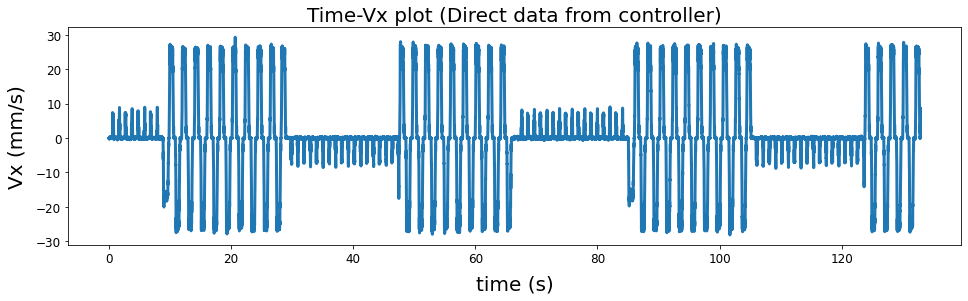

In [14]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t1, Vx, '-', linewidth = 3); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vx (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vx plot (Direct data from controller)',fontsize=20)

Text(0.5, 1.0, 'Time-Vy plot (Direct data from controller)')

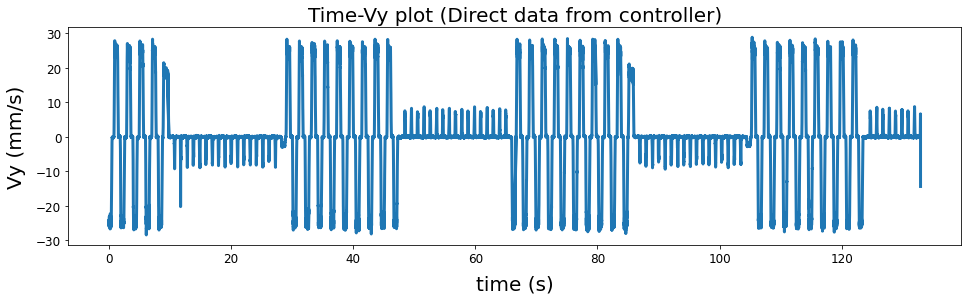

In [15]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t1, Vy, '-', linewidth = 3); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vy (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vy plot (Direct data from controller)',fontsize=20)

Text(0.5, 1.0, 'Time-Vz plot (Direct data from controller)')

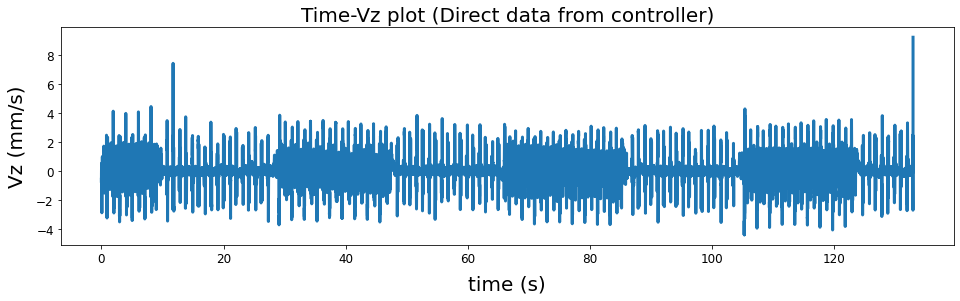

In [16]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t1, Vz, '-', linewidth = 3); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vz (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vz plot (Direct data from controller)',fontsize=20)

Text(0.5, 1.0, 'Time-Speed plot (by TF calculation from ROS)')

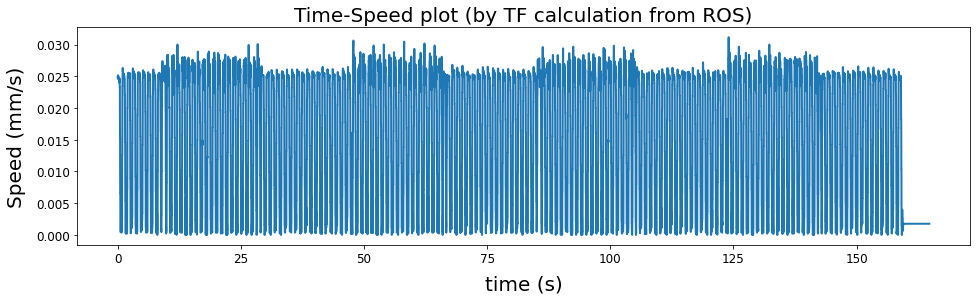

In [25]:
#------extract x,y,z value of the points-----
t2 = data["time2"]
linearX_tf = data['linearX_tf'] * 1000
linearY_tf = data['linearY_tf'] * 1000
linearZ_tf = data['linearZ_tf'] * 1000
linear_speed_calculated = data["linear_speed_calculated"]

plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t2, linear_speed_calculated, '-',  linewidth = 2); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Speed (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Speed plot (by TF calculation from ROS)',fontsize=20)

Text(0.5, 1.0, 'Time-Vx plot (by TF calculation from ROS)')

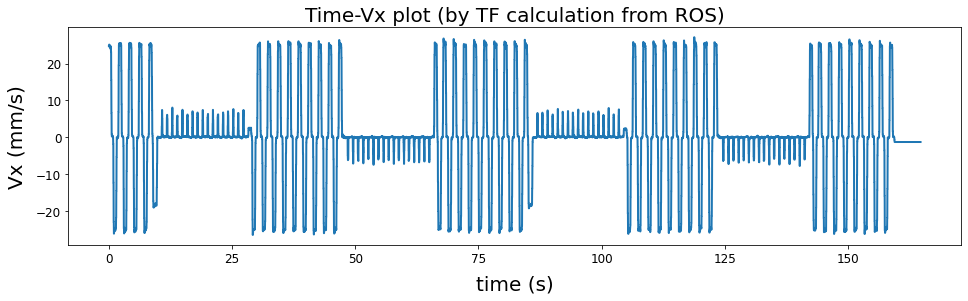

In [26]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t2, linearX_tf, '-',  linewidth = 2); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vx (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vx plot (by TF calculation from ROS)',fontsize=20)

Text(0.5, 1.0, 'Time-Vy plot (by TF calculation from ROS)')

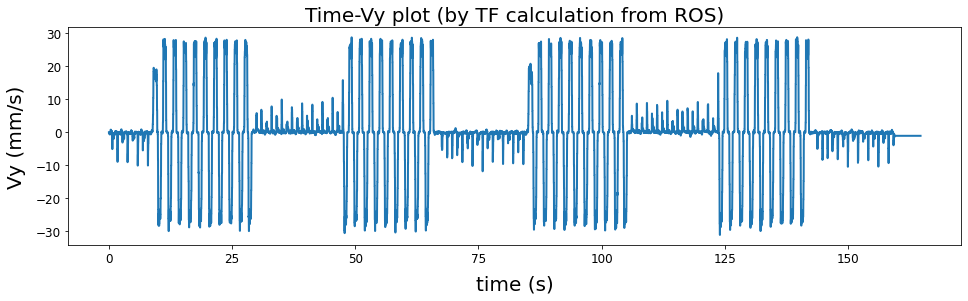

In [27]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t2, linearY_tf, '-', linewidth = 2 ); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vy (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vy plot (by TF calculation from ROS)',fontsize=20)

Text(0.5, 1.0, 'Time-Vz plot (by TF calculation from ROS)')

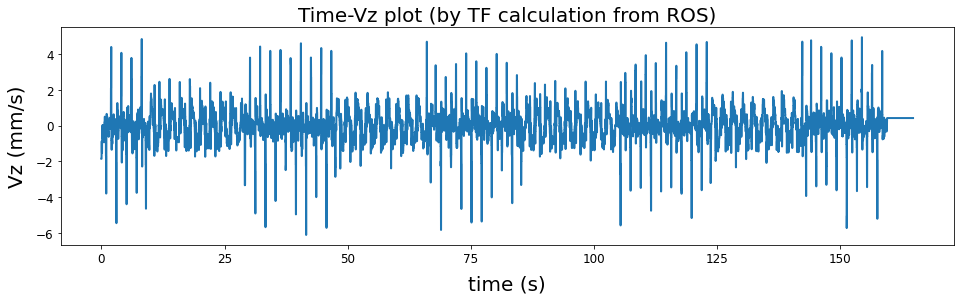

In [28]:
plt.figure(figsize=(16, 4))
# ax = plt.axes()

# Data for three-dimensional scattered points, extracted from numpy array
plt.plot(t2, linearZ_tf, '-',  linewidth = 2); # other cmap options: winter, Greens
plt.xlabel('time (s)', fontsize=20, labelpad=10)
plt.ylabel('Vz (mm/s)', fontsize=20,labelpad=10)
plt.title('Time-Vz plot (by TF calculation from ROS)',fontsize=20)